Pacotes para Instalar

In [ ]:
!pip install networkx==2.3
!pip install scikit-fuzzy

Importações e Definições de Variáveis

In [110]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
bencao = ctrl.Consequent(np.arange(0, 30, 1), 'Benção')
jejum = ctrl.Antecedent(np.arange(0, 30, 1), 'Jejum')
oracao = ctrl.Antecedent(np.arange(0, 26, 1), 'Oração')

# Faz o mapeamento de valores concretos e difusos através de uma função de pertinência com gráfico triangular
# usando uma função de pertinência padrão (triângulo)
oracao.automf(names=['Tribulação', 'Deus ampara', 'Glória a Deux'])


# Faz as funções de pertinência usando tipos variados
bencao['Oferta da Viúva'] = fuzz.trapmf(dizimo.universe, [0, 5,7, 15])
bencao['Deus é bom'] = fuzz.trapmf(dizimo.universe, [0, 14,16, 30])
bencao['Igreja Universal'] = fuzz.trapmf(dizimo.universe, [15, 25,27, 30])

jejum['Pouco'] = fuzz.trapmf(dizimo.universe, [0, 5,7, 15])
jejum['Médio'] = fuzz.trapmf(dizimo.universe, [0, 14,16, 30])
jejum['Muito'] = fuzz.trapmf(dizimo.universe, [15, 25,27, 30])

Mostra o gráfico das funções criadas

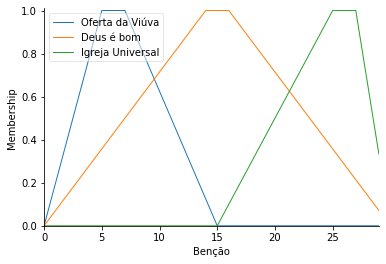

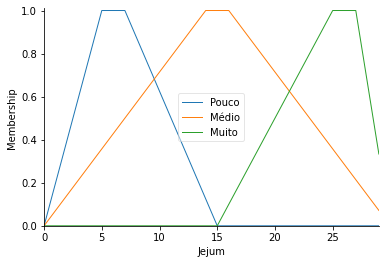

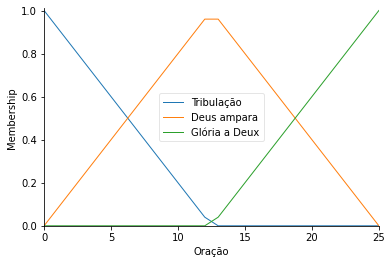

In [111]:
bencao.view()
jejum.view()
oracao.view()

Definição de Regras

In [114]:
regra1 = ctrl.Rule(jejum['Muito'] | oracao['Glória a Deux'], bencao["Igreja Universal"])
regra2 = ctrl.Rule(jejum['Médio'], bencao["Deus é bom"])
regra3 = ctrl.Rule(jejum['Pouco'] & oracao['Tribulação'], bencao["Oferta da Viúva"])

bencao_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
bencao_simulador = ctrl.ControlSystemSimulation(bencao_ctrl)


Entrada de Valores e total da Gorjeta

In [124]:
# Entrada de valor para salário
bencao_simulador.input['Jejum'] = 30.5
bencao_simulador.input['Oração'] = 15.4

# Computando o resultado
bencao_simulador.compute()
print(bencao_simulador.output['Benção'])

19.736940615960528


Resultado Gráfico

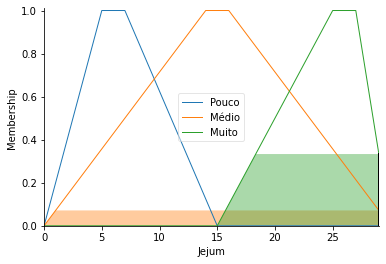

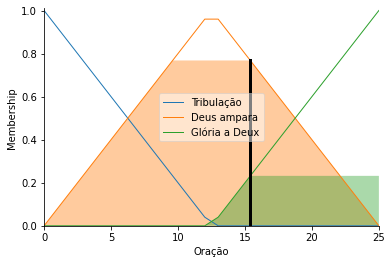

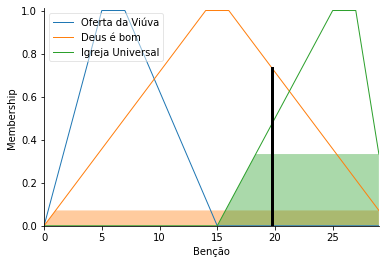

In [126]:
jejum.view(sim=bencao_simulador)
oracao.view(sim=bencao_simulador)
bencao.view(sim=bencao_simulador)